In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

# ✅ 1. Load your data
df_single = pd.read_csv("/content/results-picker-exp-single-26-04.csv")
df_batch = pd.read_csv("/content/results-picker-exp-batch-26-04.csv")
df_zone = pd.read_csv("/content/results-picker-exp-zone-26-04.csv")
coli=["Number of Pickers","Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]
df_single.columns=coli
df_batch.columns=coli
df_zone.columns=coli
df_single["Strategy"] = "Single Picking"
df_batch["Strategy"] = "Batch Picking"
df_zone["Strategy"] = "Zone Picking"

# Combine all
df = pd.concat([df_single, df_batch, df_zone], ignore_index=True)

print(df.head())

# ✅ 2. Compute CI and PI
def compute_ci_pi(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    t_value = stats.t.ppf(1 - (1-confidence)/2, df=n-1)

    ci_half_width = t_value * (std / np.sqrt(n))
    pi_half_width = t_value * std * np.sqrt((1/28) + 1/n)

    return mean, ci_half_width, pi_half_width

metrics = ["Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]

analysis_results = []

for strategy in df["Strategy"].unique():
    df_strategy = df[df["Strategy"] == strategy]
    print(f"\n=== {strategy} ===")
    for metric in metrics:
        mean, ci, pi = compute_ci_pi(df_strategy[metric])
        print(f"{metric} | Mean = {mean:.2f}, 95% CI ±{ci:.2f}, 95% PI ±{pi:.2f}")

        analysis_results.append({
            "Strategy": strategy,
            "Metric": metric,
            "Mean": mean,
            "95% CI Half Width": ci,
            "95% PI Half Width": pi
        })

# ✅ 3. Output Plots

# 3.1. Boxplots for each metric comparing Strategies
def plot_boxplot_metric(df, metric_name):
    plt.figure(figsize=(10,6))
    sns.boxplot(x="Strategy", y=metric_name, data=df, palette="Set2")
    plt.title(f"{metric_name} Distribution across Strategies")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3.2. Lineplots of Metric vs Number of Pickers
def plot_line_metric(df, metric_name):
    plt.figure(figsize=(10,6))
    sns.lineplot(x="Number of Pickers", y=metric_name, hue="Strategy", data=df, marker="o")
    plt.title(f"{metric_name} vs Number of Pickers")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3.3. Scatterplot of Picker Utilization vs Throughput
def plot_picker_vs_throughput(df):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x="picker utilization", y="Throughput", hue="Strategy", data=df)
    plt.title("Picker Utilization vs Throughput")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# ✅ 5. Experimental Use Cases - Batch Size (Ready but Commented)

# -------- Uncomment below when you have batch size data --------

# df_batch_2 = pd.read_csv("results-batchsize-2.csv")
# df_batch_3 = pd.read_csv("results-batchsize-3.csv")
# df_batch_5 = pd.read_csv("results-batchsize-5.csv")

# df_batch_2["Batch Size"] = 2
# df_batch_3["Batch Size"] = 3
# df_batch_5["Batch Size"] = 5

# df_batch_all = pd.concat([df_batch_2, df_batch_3, df_batch_5], ignore_index=True)

# # Optional: if needed, add Strategy column
# df_batch_all["Strategy"] = "Batch Picking"

# print(df_batch_all.head())

# # Plot: Throughput vs Batch Size
# plt.figure(figsize=(10,6))
# sns.lineplot(x="Batch Size", y="Throughput", data=df_batch_all, marker="o")
# plt.title("Throughput vs Batch Size in Batch Picking")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Plot: Cycle Time vs Batch Size
# plt.figure(figsize=(10,6))
# sns.lineplot(x="Batch Size", y="Cycle Time", data=df_batch_all, marker="o")
# plt.title("Cycle Time vs Batch Size in Batch Picking")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# ---------------------------------------------------------------


   Number of Pickers  Cycle Time  picker utilization  Orders per Labour Hour  \
0                  3   30.082344            0.045645              137.594927   
1                  3   30.232206            0.041161              140.502912   
2                  3   30.112732            0.047739              139.184249   
3                  3   30.803896            0.048366              139.053663   
4                  3   30.007177            0.045824              140.494712   

   Throughput        Strategy  
0   17.465382  Single Picking  
1   15.849402  Single Picking  
2   18.545826  Single Picking  
3   18.303192  Single Picking  
4   18.091819  Single Picking  

=== Single Picking ===
Cycle Time | Mean = 30.30, 95% CI ±0.06, 95% PI ±0.18
picker utilization | Mean = 0.04, 95% CI ±0.00, 95% PI ±0.01
Orders per Labour Hour | Mean = 139.60, 95% CI ±0.27, 95% PI ±0.90
Throughput | Mean = 18.38, 95% CI ±0.10, 95% PI ±0.32

=== Batch Picking ===
Cycle Time | Mean = 260.68, 95% CI ±1.44, 95

<ipython-input-9-936e5daaa1f1>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Strategy", y=metric_name, data=df, palette="Set2")


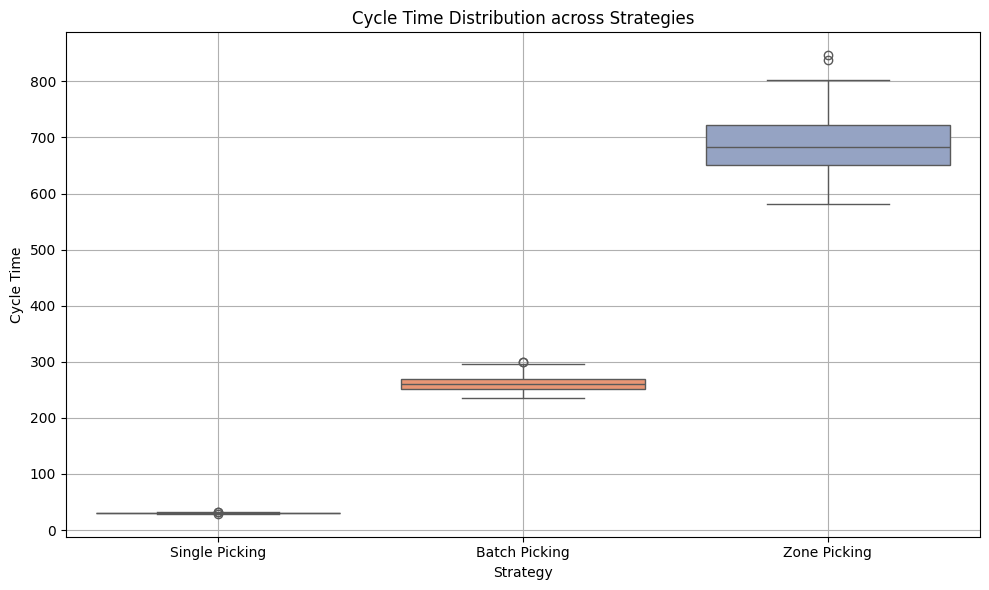

<ipython-input-9-936e5daaa1f1>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Strategy", y=metric_name, data=df, palette="Set2")


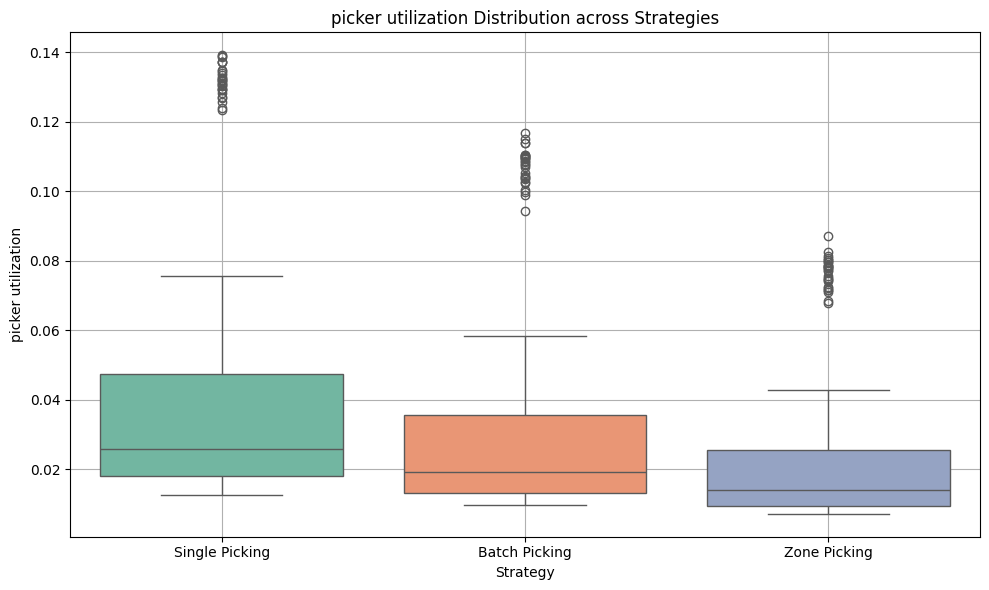

<ipython-input-9-936e5daaa1f1>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Strategy", y=metric_name, data=df, palette="Set2")


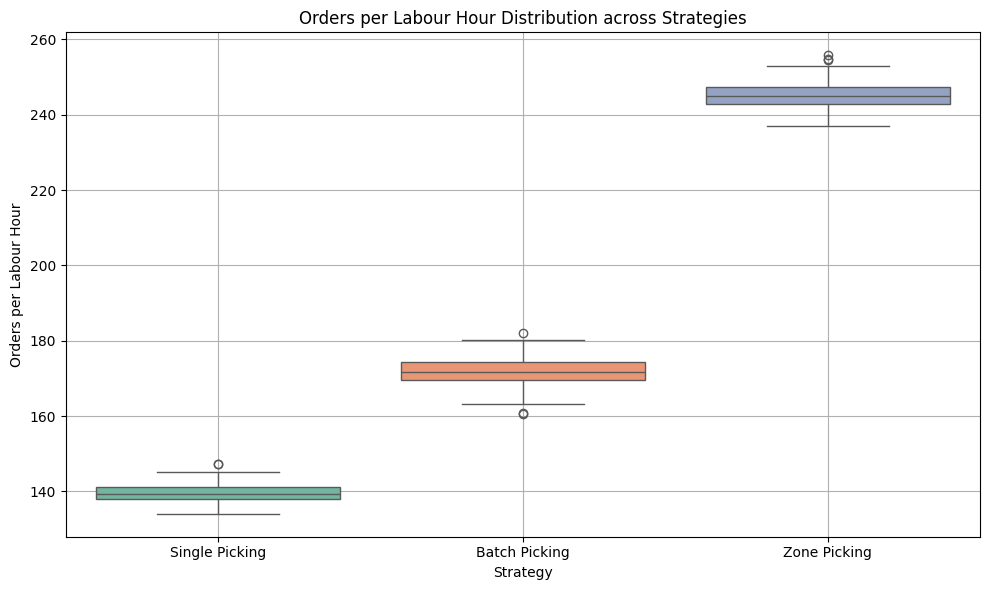

<ipython-input-9-936e5daaa1f1>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Strategy", y=metric_name, data=df, palette="Set2")


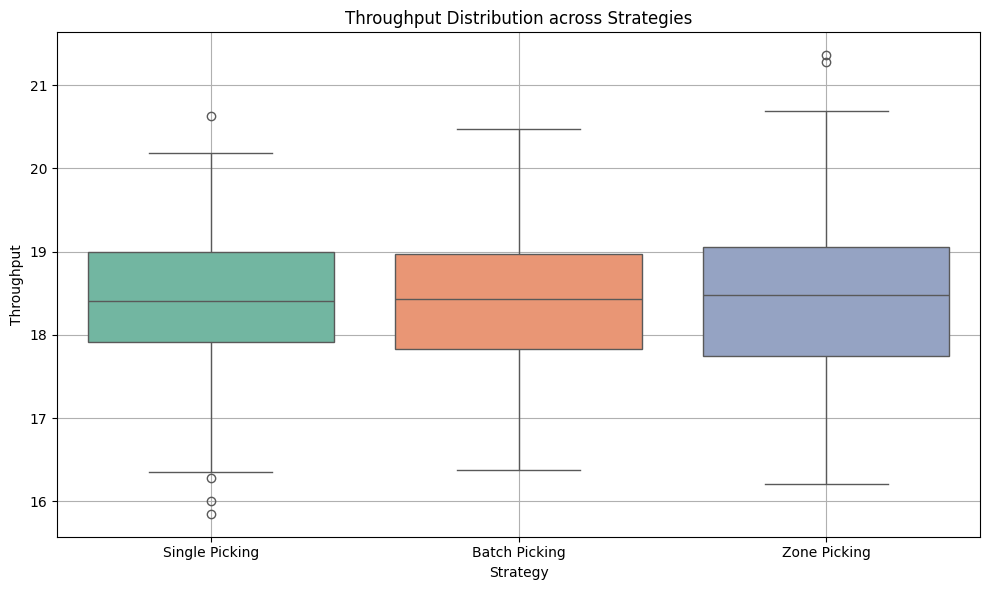

In [ ]:
# ✅ 4. Generate plots
for metric in metrics:
    plot_boxplot_metric(df, metric)



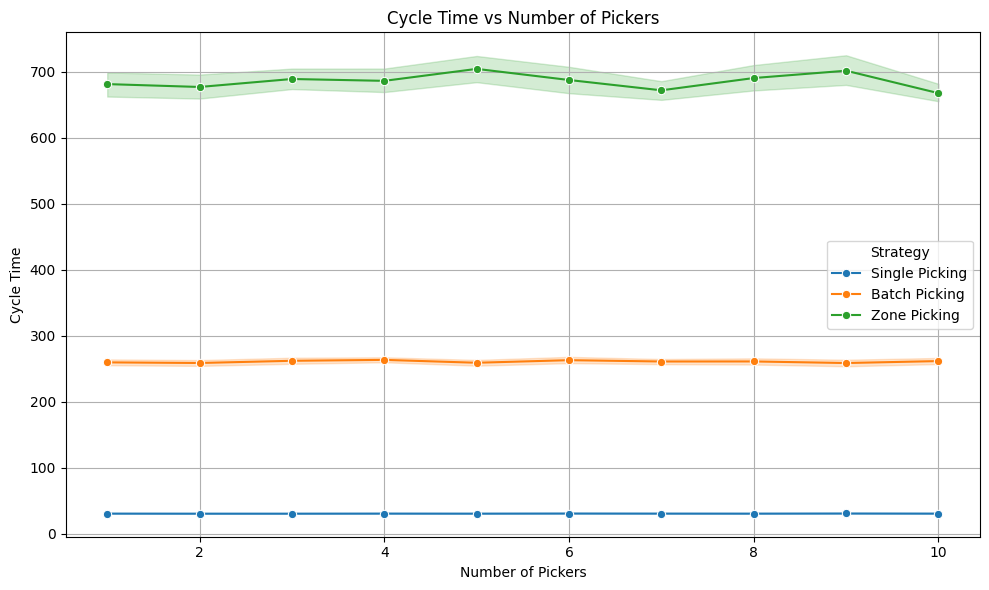

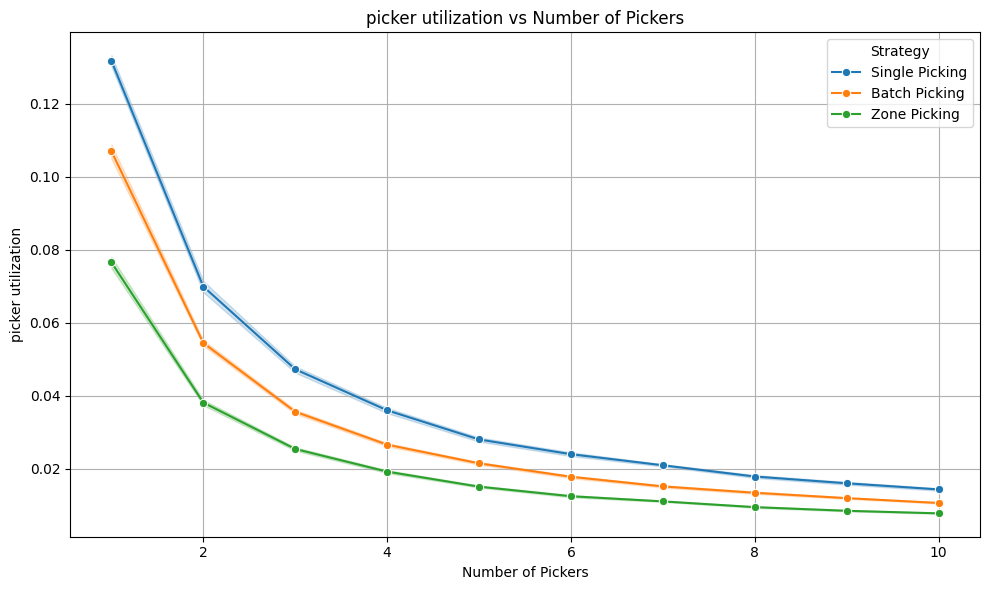

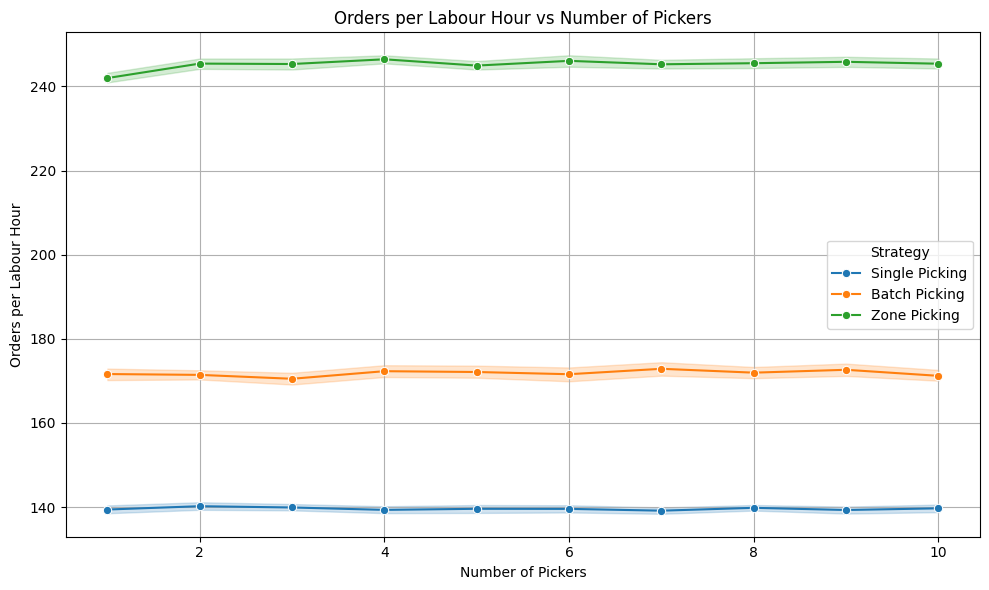

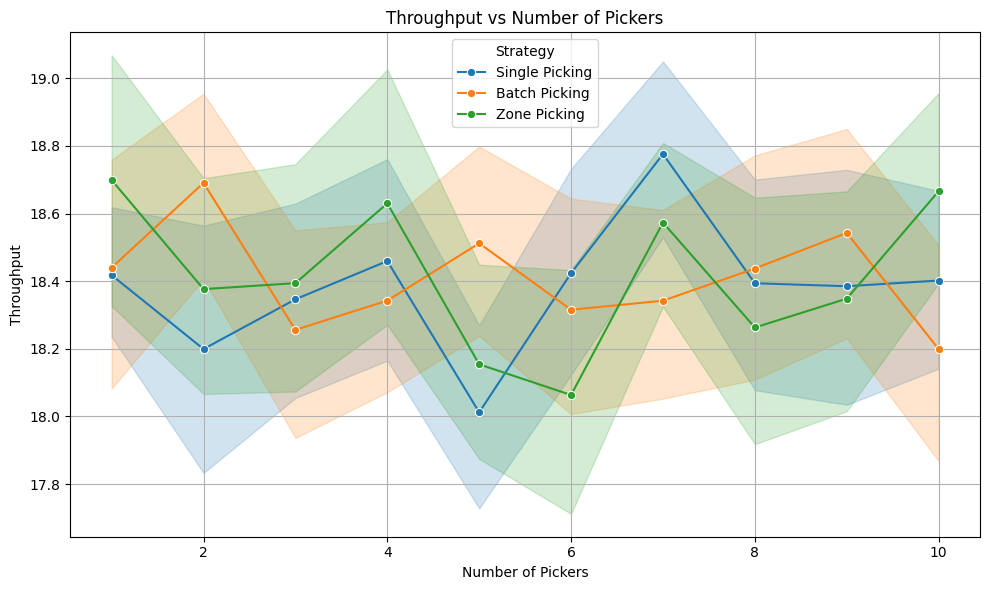

In [ ]:
for metric in metrics:
    plot_line_metric(df, metric)


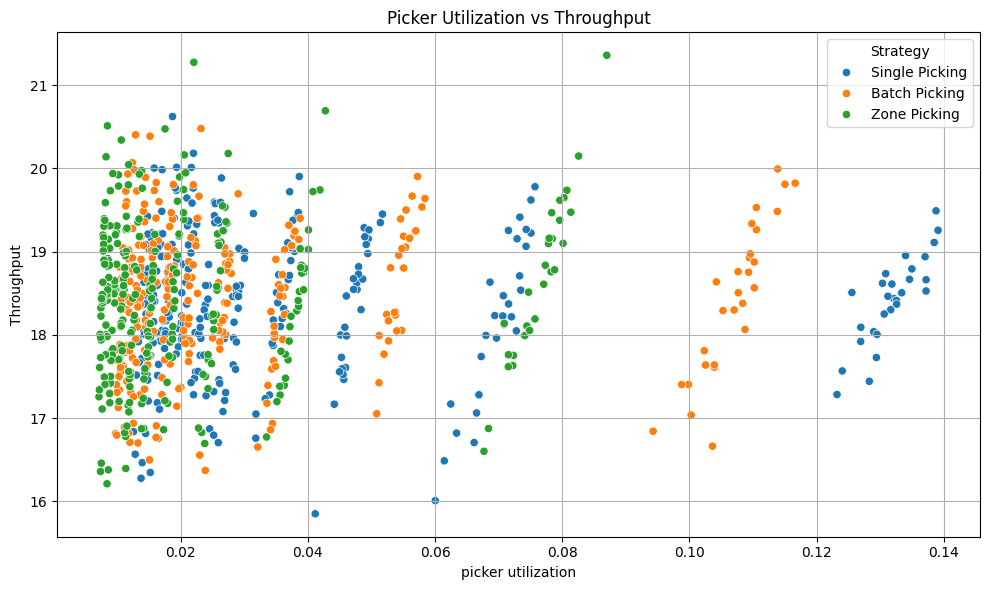

In [ ]:
plot_picker_vs_throughput(df)


🎯 Picker Strategy Comparison Data Loaded
   Number of Pickers  Cycle Time  picker utilization  Orders per Labour Hour  \
0                  3   30.082344            0.045645              137.594927   
1                  3   30.232206            0.041161              140.502912   
2                  3   30.112732            0.047739              139.184249   
3                  3   30.803896            0.048366              139.053663   
4                  3   30.007177            0.045824              140.494712   

   Throughput        Strategy  
0   17.465382  Single Picking  
1   15.849402  Single Picking  
2   18.545826  Single Picking  
3   18.303192  Single Picking  
4   18.091819  Single Picking  

🎯 Batch Size Variation Data Loaded
   Batch Size  Cycle Time  picker utilization  Orders per Labour Hour  \
0           2   132.08770            0.115719              159.870454   
1           2   136.99092            0.115115              162.156679   
2           2   149.02989     

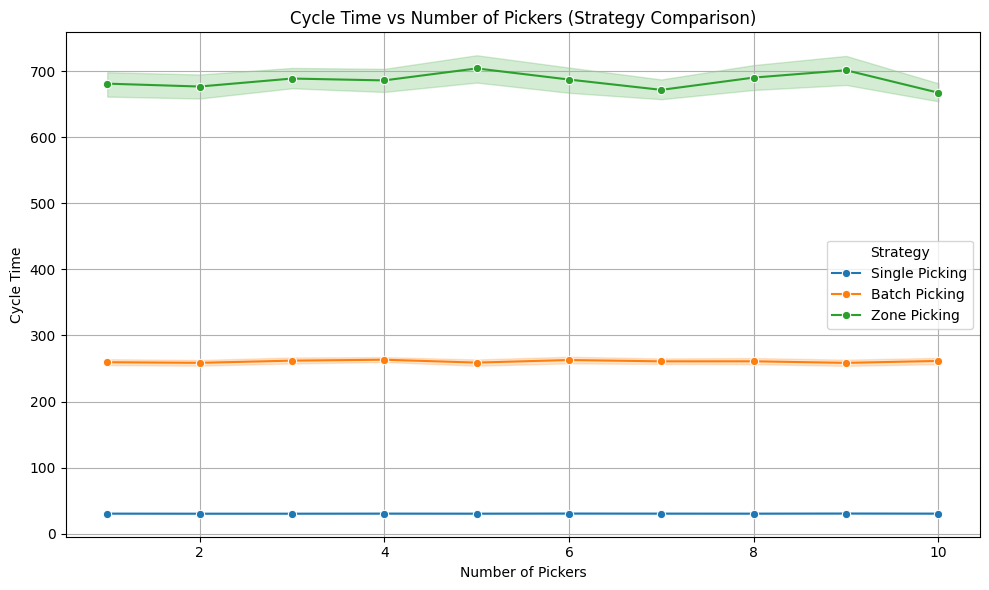

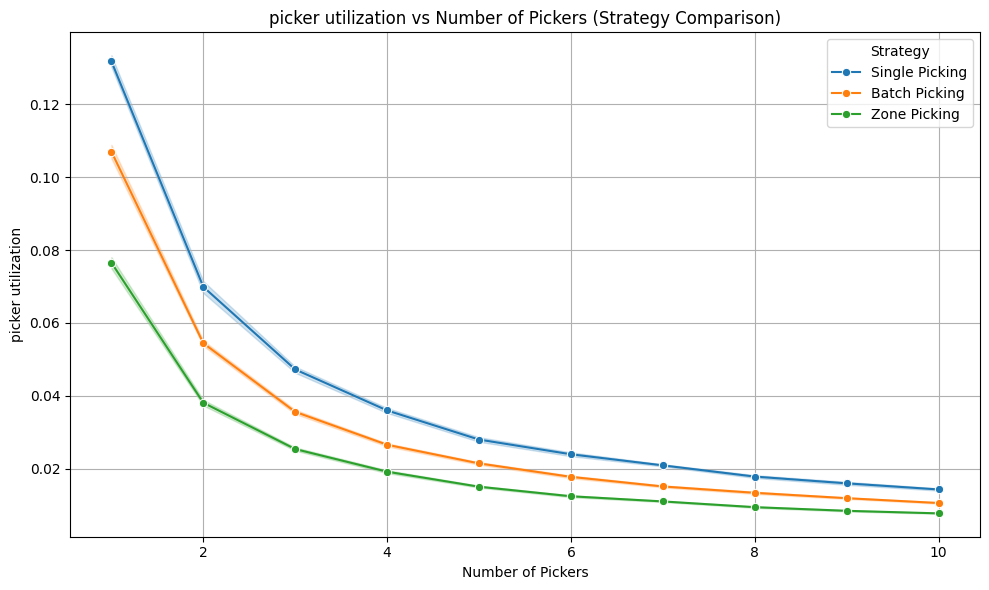

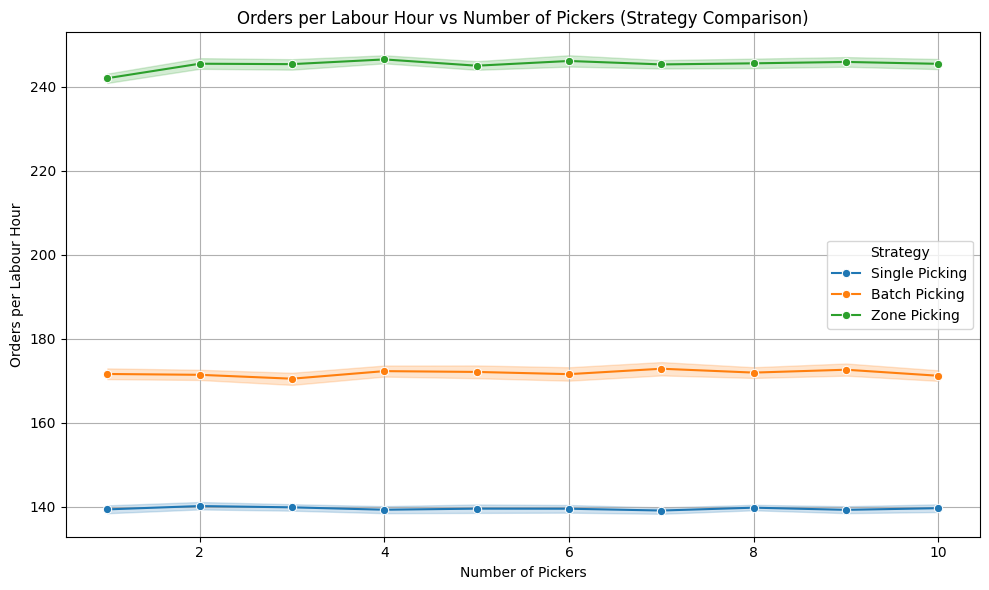

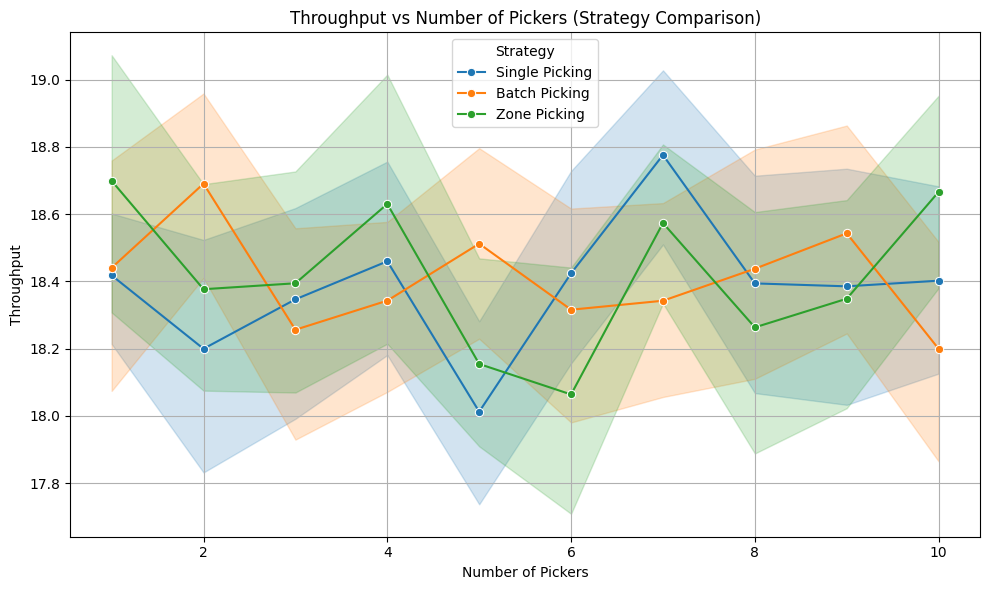

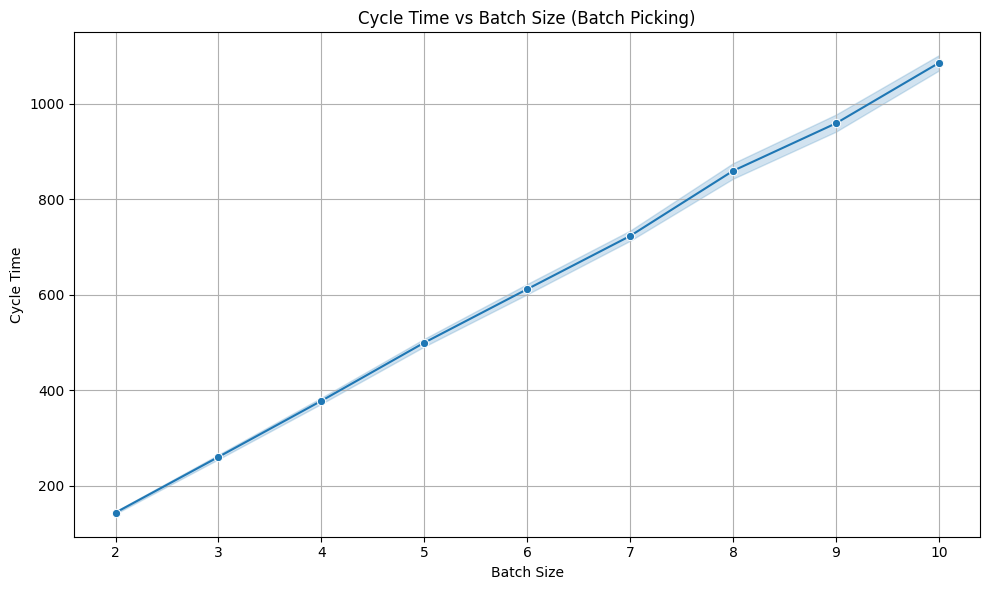

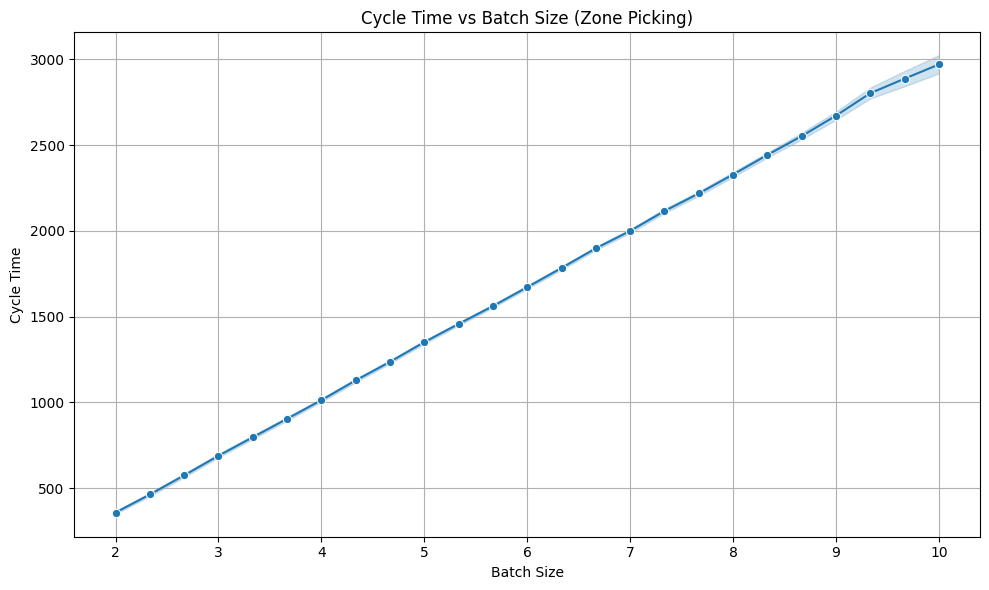

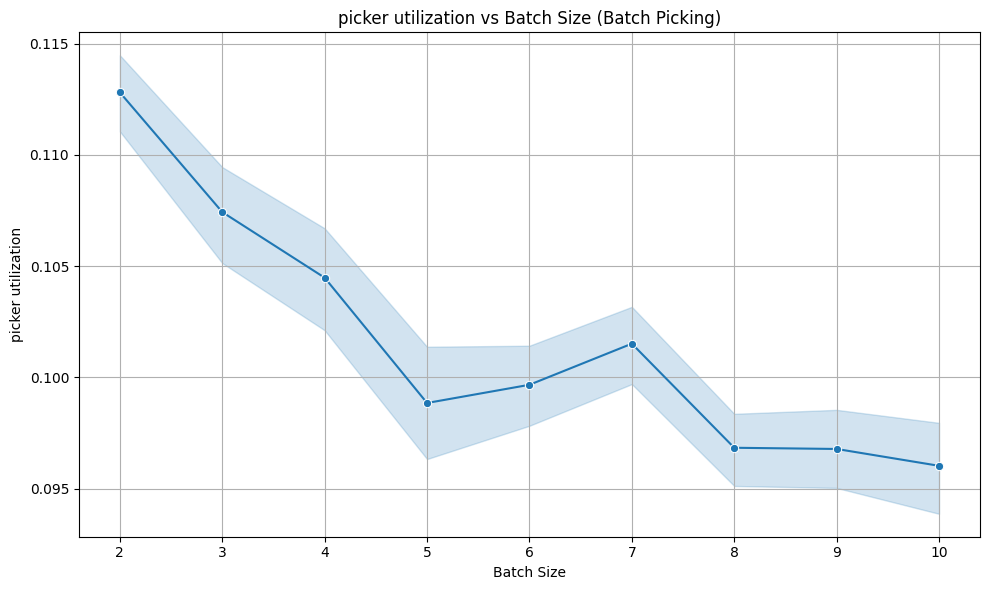

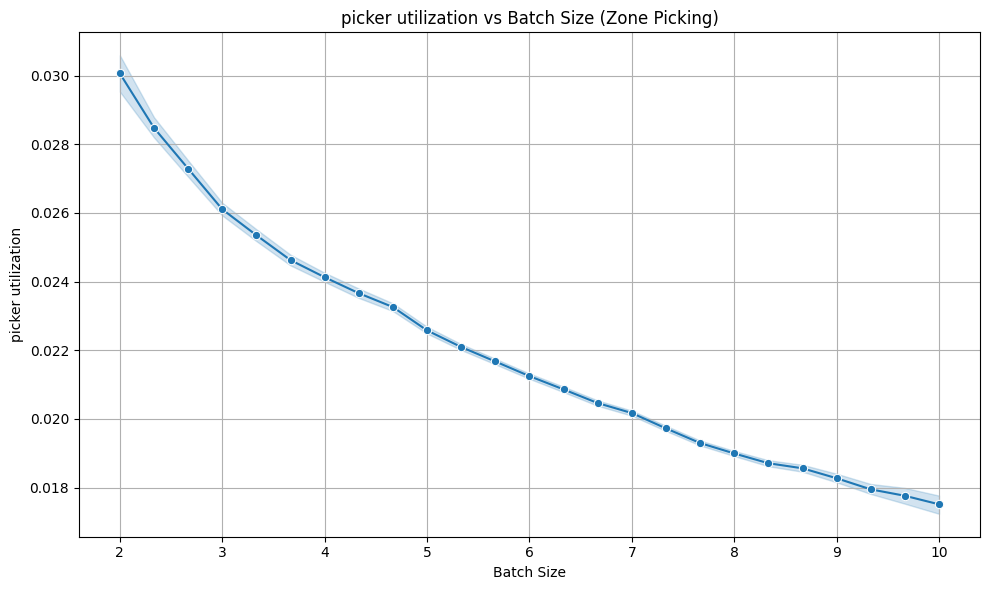

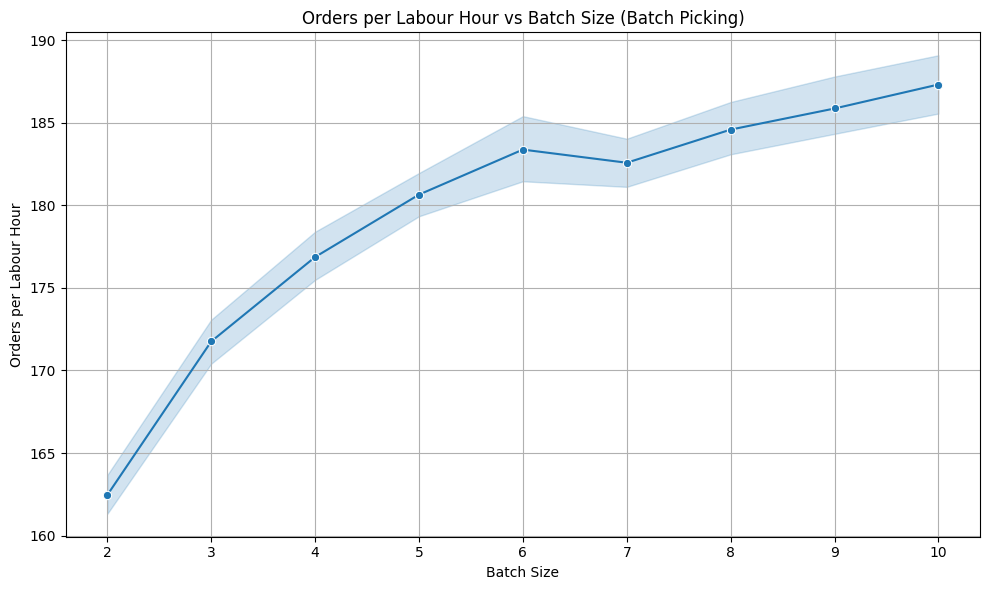

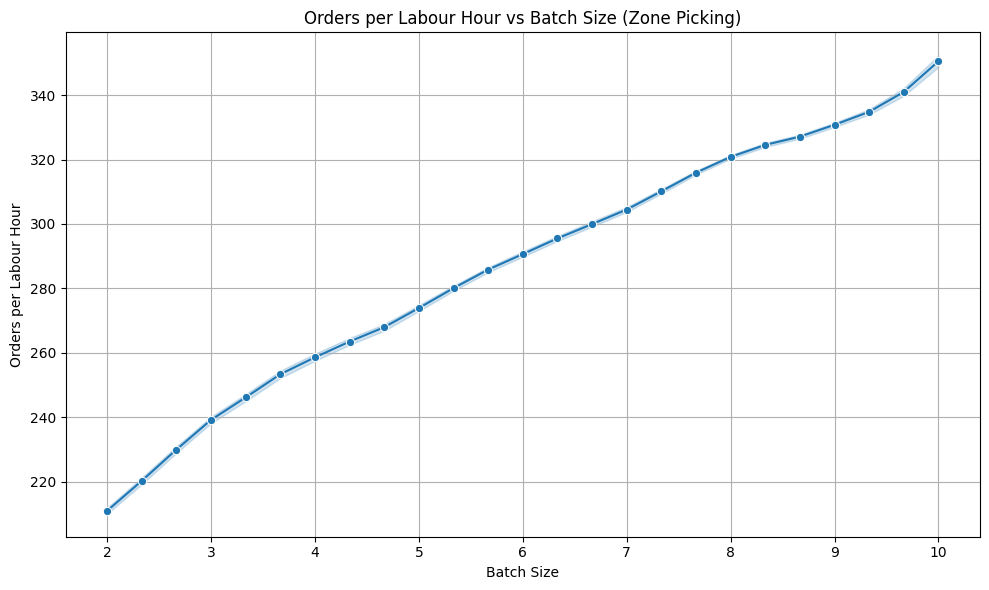

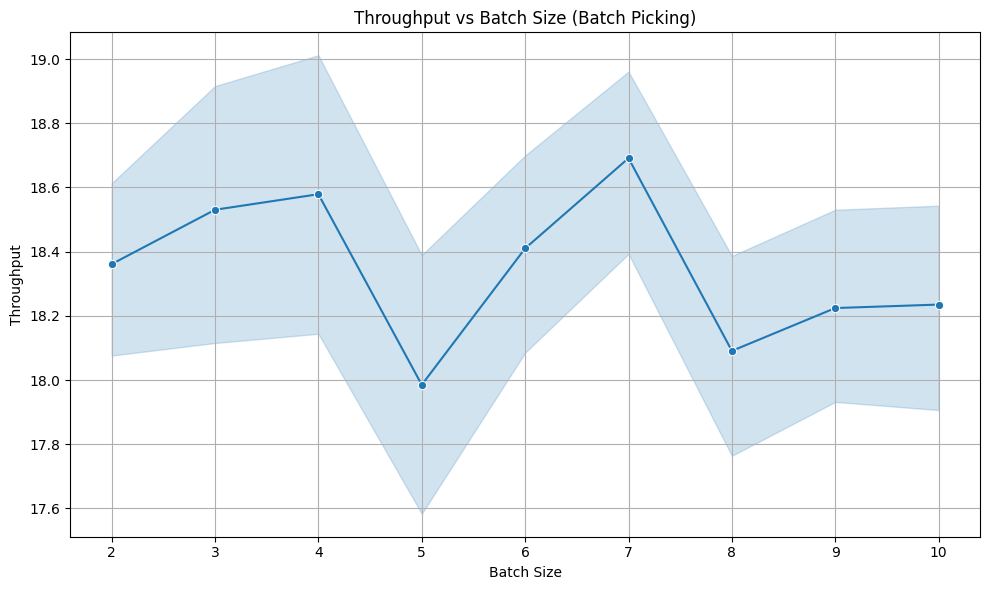

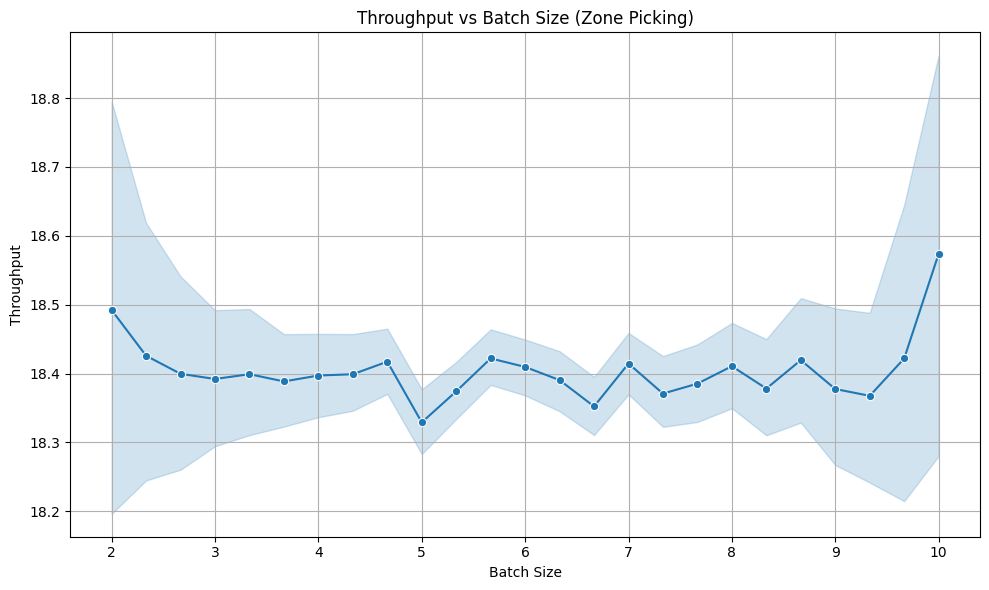

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

# 📂 1. Load Picker Strategy Comparison Data
df_single = pd.read_csv("/content/results-picker-exp-single-26-04.csv")
df_batch = pd.read_csv("/content/results-picker-exp-batch-26-04.csv")
df_zone = pd.read_csv("/content/results-picker-exp-zone-26-04.csv")

coli = ["Number of Pickers", "Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]
df_single.columns = coli
df_batch.columns = coli
df_zone.columns = coli

df_single["Strategy"] = "Single Picking"
df_batch["Strategy"] = "Batch Picking"
df_zone["Strategy"] = "Zone Picking"

df_pickers = pd.concat([df_single, df_batch, df_zone], ignore_index=True)

print("\n🎯 Picker Strategy Comparison Data Loaded")
print(df_pickers.head())

# 📂 2. Load Batch Size Variation Data
df_batchsize_batch = pd.read_csv("/content/results-batchsize-exp-batch-27-04.csv")
df_batchsize_batch.columns = ["Batch Size", "Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]
df_batchsize_batch["Strategy"] = "Batch Picking (Batch Size Variation)"

df_batchsize_zone = pd.read_csv("/content/results-batchsize-exp-zone-27-04.csv")
df_batchsize_zone.columns = ["Batch Size Zone 1", "Batch Size Zone 2", "Batch Size Zone 3", "Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]
df_batchsize_zone["Batch Size"] = df_batchsize_zone[["Batch Size Zone 1", "Batch Size Zone 2", "Batch Size Zone 3"]].mean(axis=1)
df_batchsize_zone["Strategy"] = "Zone Picking (Batch Size Variation)"

print("\n🎯 Batch Size Variation Data Loaded")
print(df_batchsize_batch.head())
print(df_batchsize_zone.head())

# 📏 3. CI and PI Computation Function
def compute_ci_pi(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    t_value = stats.t.ppf(1 - (1-confidence)/2, df=n-1)
    ci_half_width = t_value * (std / np.sqrt(n))
    pi_half_width = t_value * std * np.sqrt((1/28) + 1/n)
    return mean, ci_half_width, pi_half_width

metrics = ["Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]

# 📏 4. CI/PI Computation for Picker Strategy Experiment
print("\n📊 CI/PI Computation: Strategy vs Number of Pickers")
analysis_results = []

for strategy in df_pickers["Strategy"].unique():
    df_strategy = df_pickers[df_pickers["Strategy"] == strategy]
    for pickers in sorted(df_strategy["Number of Pickers"].unique()):
        df_sub = df_strategy[df_strategy["Number of Pickers"] == pickers]
        print(f"\n=== {strategy} | Number of Pickers = {pickers} ===")
        for metric in metrics:
            mean, ci, pi = compute_ci_pi(df_sub[metric])
            print(f"{metric} | Mean = {mean:.2f}, 95% CI ±{ci:.2f}, 95% PI ±{pi:.2f}")
            analysis_results.append({
                "Experiment": "Picker Strategy",
                "Strategy": strategy,
                "Number of Pickers": pickers,
                "Metric": metric,
                "Mean": mean,
                "95% CI Half Width": ci,
                "95% PI Half Width": pi
            })

# 📏 5. CI/PI Computation for Batch Size Variation Experiment
print("\n📊 CI/PI Computation: Batch Size Variation")

for df_bsize, label in zip([df_batchsize_batch, df_batchsize_zone],
                           ["Batch Picking (Batch Size)", "Zone Picking (Batch Size)"]):
    for batch_size in sorted(df_bsize["Batch Size"].unique()):
        df_sub = df_bsize[df_bsize["Batch Size"] == batch_size]
        print(f"\n=== {label} | Batch Size = {batch_size} ===")
        for metric in metrics:
            mean, ci, pi = compute_ci_pi(df_sub[metric])
            print(f"{metric} | Mean = {mean:.2f}, 95% CI ±{ci:.2f}, 95% PI ±{pi:.2f}")
            analysis_results.append({
                "Experiment": "Batch Size Variation",
                "Strategy": label,
                "Batch Size": batch_size,
                "Metric": metric,
                "Mean": mean,
                "95% CI Half Width": ci,
                "95% PI Half Width": pi
            })

# 📂 Save all results
df_analysis = pd.DataFrame(analysis_results)
print("\n✅ Full Analysis Summary")
print(df_analysis)

# 📊 6. Plotting

# 📈 Picking Strategies
def plot_pickers_metric(df, metric_name):
    plt.figure(figsize=(10,6))
    sns.lineplot(x="Number of Pickers", y=metric_name, hue="Strategy", data=df, marker="o")
    plt.title(f"{metric_name} vs Number of Pickers (Strategy Comparison)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📈 Batch Size Variation
def plot_batchsize_metric(df_batch, metric_name, title_suffix):
    plt.figure(figsize=(10,6))
    sns.lineplot(x="Batch Size", y=metric_name, data=df_batch, marker="o")
    plt.title(f"{metric_name} vs Batch Size ({title_suffix})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 🎯 Generate Plots
for metric in metrics:
    plot_pickers_metric(df_pickers, metric)

for metric in ["Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]:
    plot_batchsize_metric(df_batchsize_batch, metric, "Batch Picking")
    plot_batchsize_metric(df_batchsize_zone, metric, "Zone Picking")



🎯 Picker Strategy Comparison Data Loaded
   Number of Pickers  Cycle Time  picker utilization  Orders per Labour Hour  \
0                  3   30.082344            0.045645              137.594927   
1                  3   30.232206            0.041161              140.502912   
2                  3   30.112732            0.047739              139.184249   
3                  3   30.803896            0.048366              139.053663   
4                  3   30.007177            0.045824              140.494712   

   Throughput        Strategy  
0   17.465382  Single Picking  
1   15.849402  Single Picking  
2   18.545826  Single Picking  
3   18.303192  Single Picking  
4   18.091819  Single Picking  

🎯 Batch Size Variation Data Loaded
   Batch Size  Cycle Time  picker utilization  Orders per Labour Hour  \
0           2   132.08770            0.115719              159.870454   
1           2   136.99092            0.115115              162.156679   
2           2   149.02989     

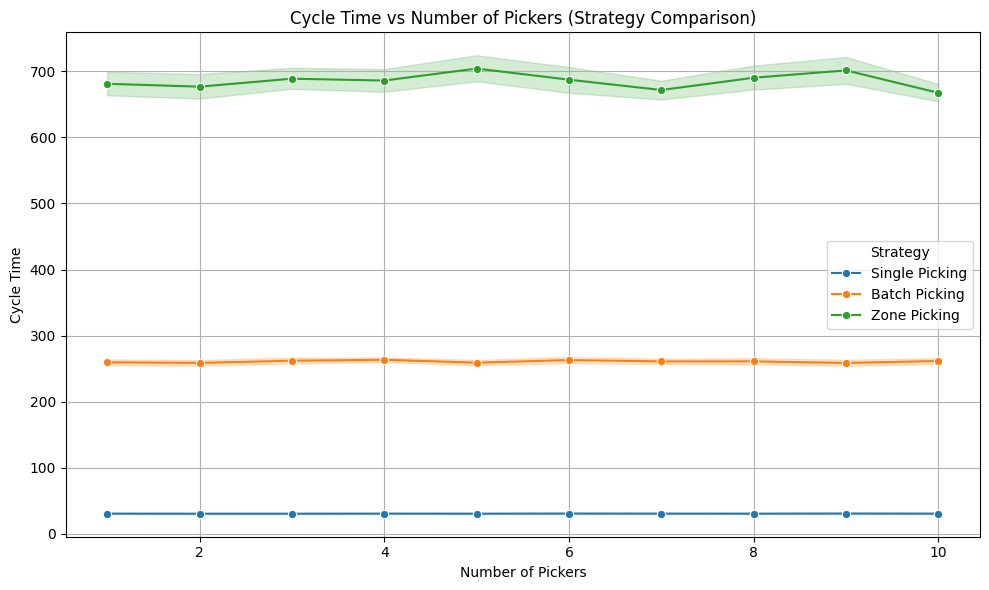

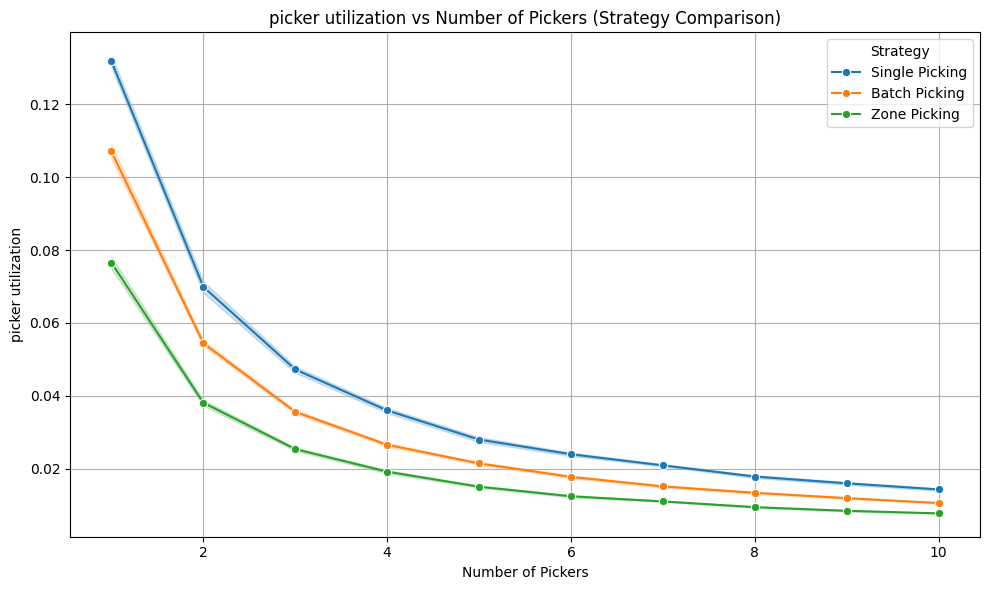

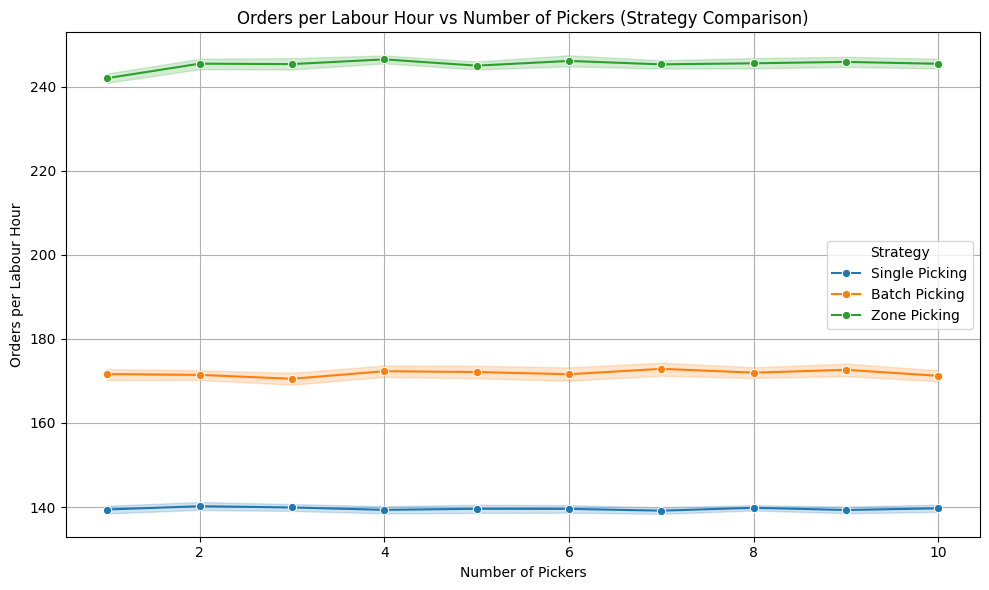

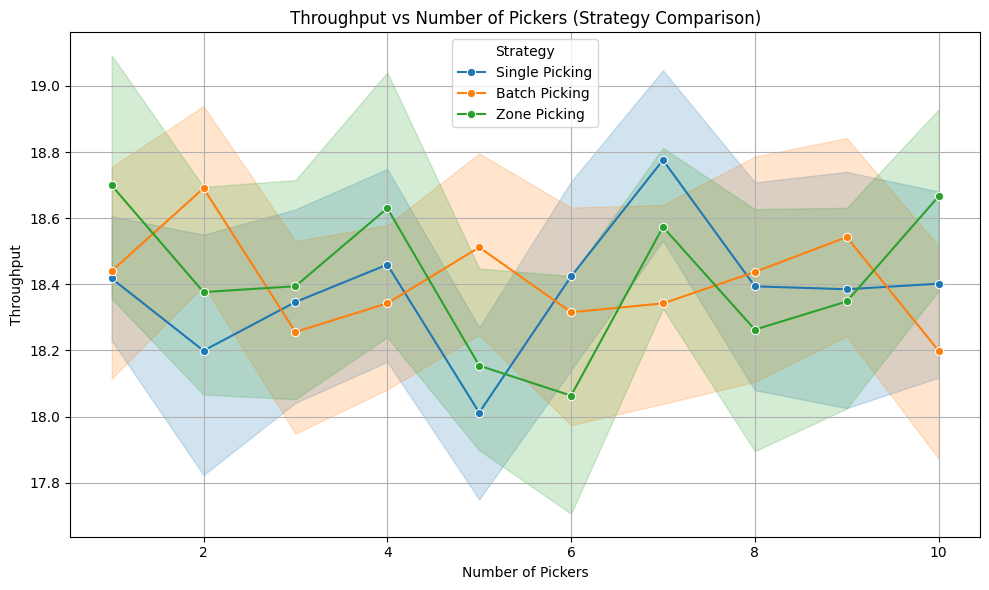

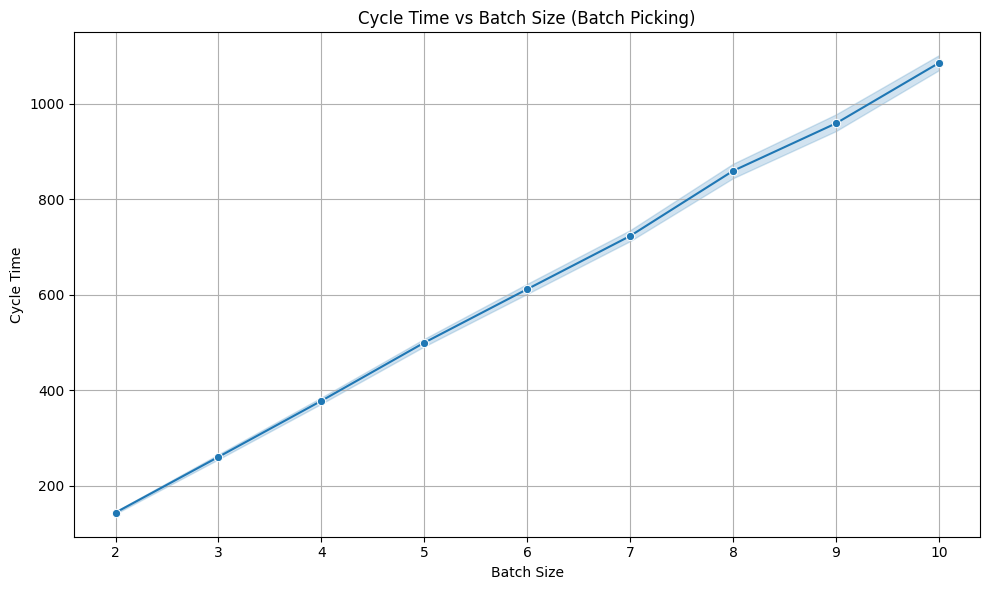

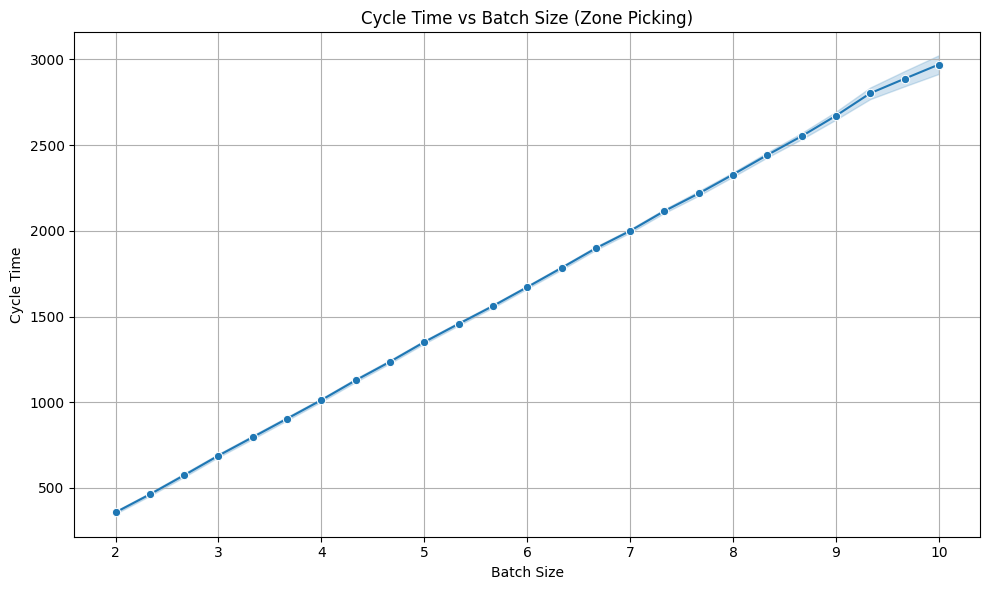

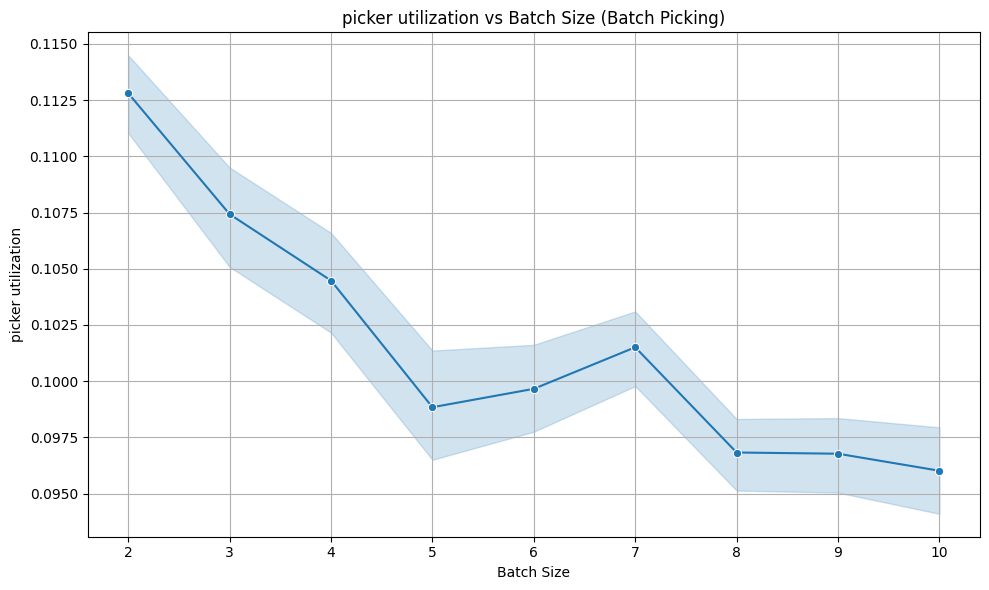

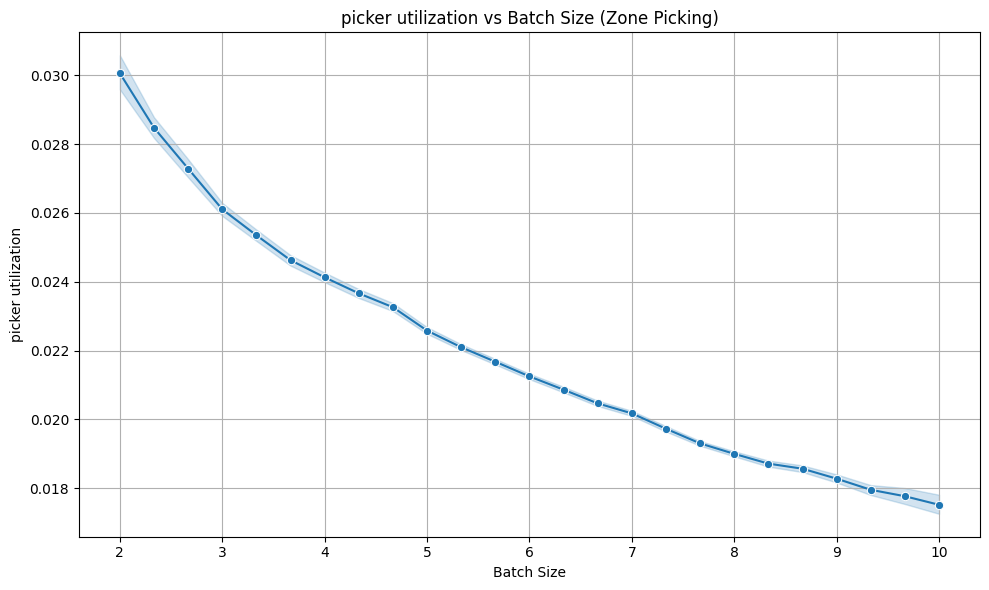

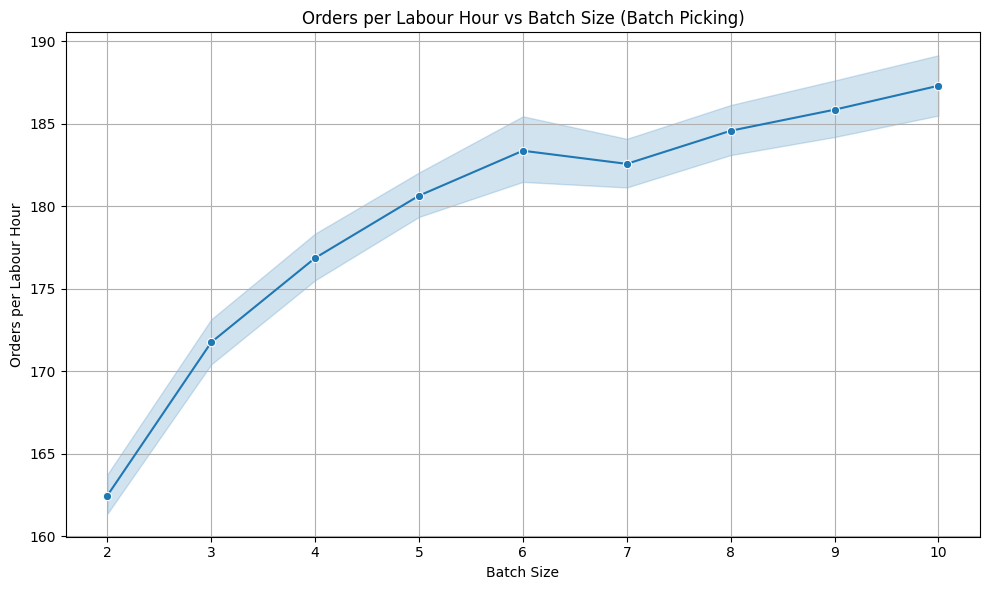

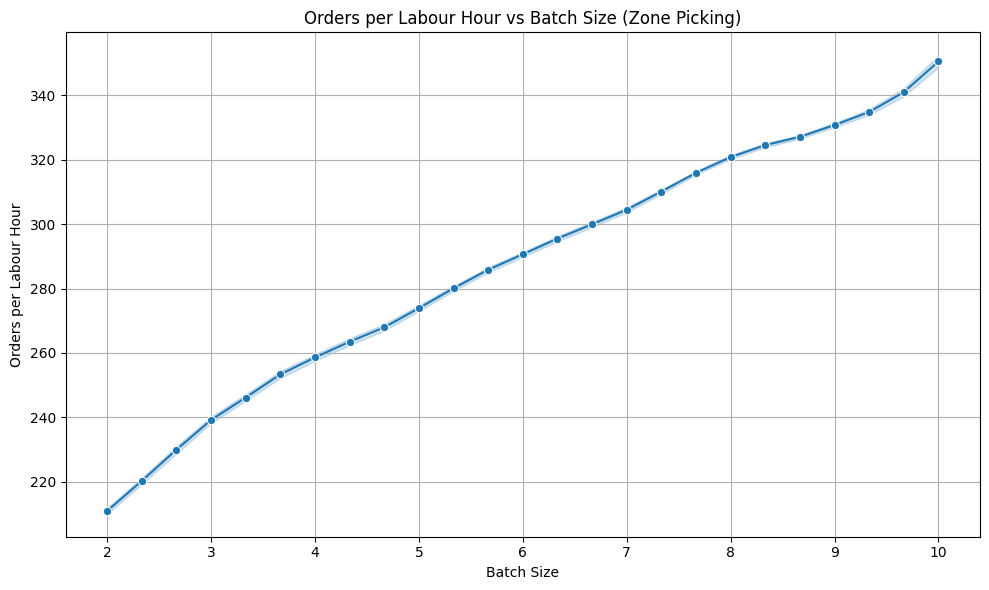

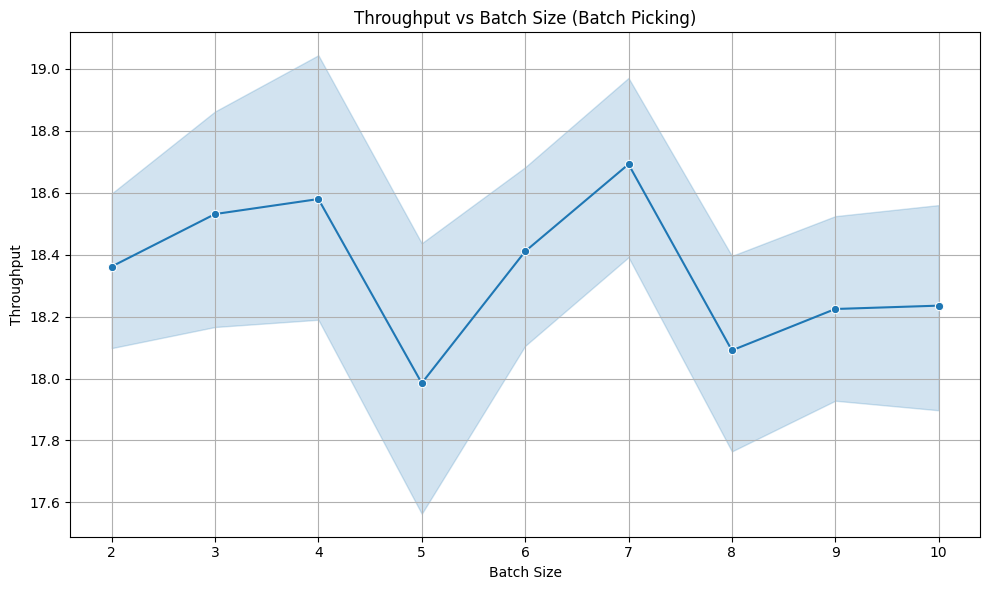

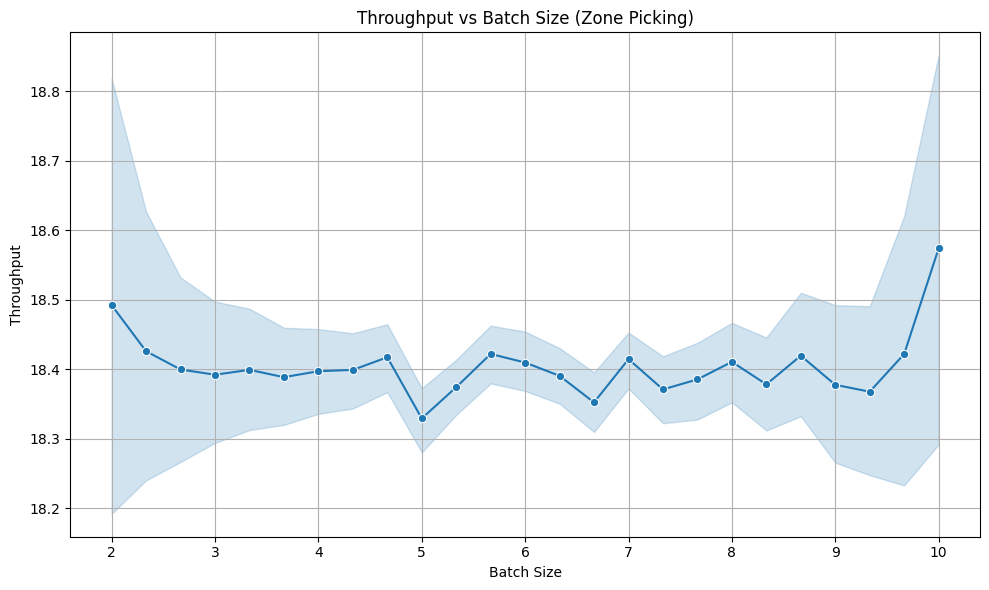

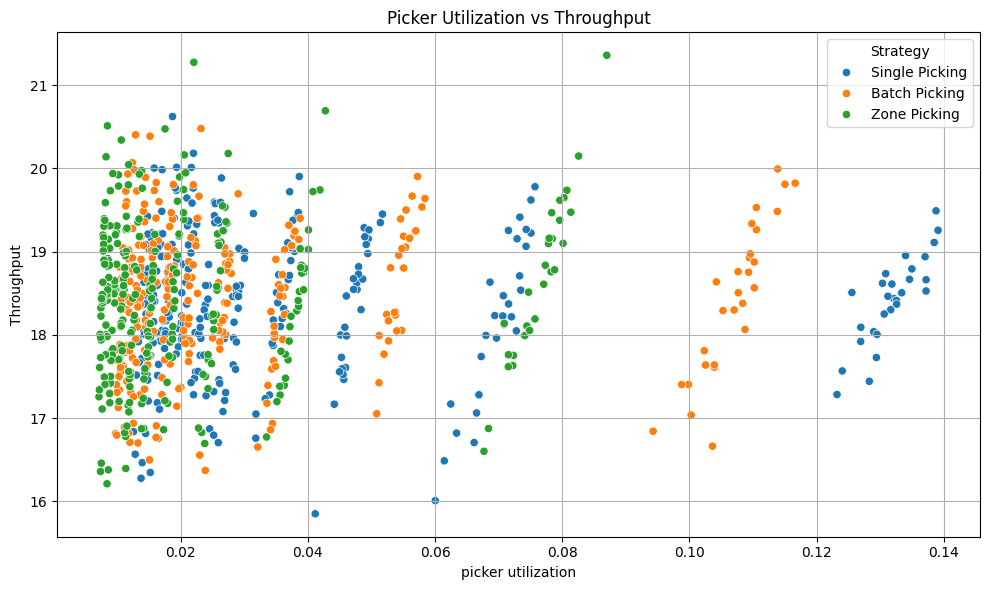

No pickers with 60%-80% utilization found for Single Picking
No pickers with 60%-80% utilization found for Batch Picking
No pickers with 60%-80% utilization found for Zone Picking

🏆 Optimal Number of Pickers per Strategy:
Empty DataFrame
Columns: []
Index: []

🏆 Optimal Batch Size per Strategy:
                     Strategy  Best Batch Size  Throughput
0  Batch Picking (Batch Size)              7.0   18.691207
1   Zone Picking (Batch Size)             10.0   18.573917


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

# 📂 1. Load Picker Strategy Comparison Data
df_single = pd.read_csv("/content/results-picker-exp-single-26-04.csv")
df_batch = pd.read_csv("/content/results-picker-exp-batch-26-04.csv")
df_zone = pd.read_csv("/content/results-picker-exp-zone-26-04.csv")

coli = ["Number of Pickers", "Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]
df_single.columns = coli
df_batch.columns = coli
df_zone.columns = coli

df_single["Strategy"] = "Single Picking"
df_batch["Strategy"] = "Batch Picking"
df_zone["Strategy"] = "Zone Picking"

df_pickers = pd.concat([df_single, df_batch, df_zone], ignore_index=True)

print("\n🎯 Picker Strategy Comparison Data Loaded")
print(df_pickers.head())

# 📂 2. Load Batch Size Variation Data
df_batchsize_batch = pd.read_csv("/content/results-batchsize-exp-batch-27-04.csv")
df_batchsize_batch.columns = ["Batch Size", "Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]
df_batchsize_batch["Strategy"] = "Batch Picking (Batch Size Variation)"

df_batchsize_zone = pd.read_csv("/content/results-batchsize-exp-zone-27-04.csv")
df_batchsize_zone.columns = ["Batch Size Zone 1", "Batch Size Zone 2", "Batch Size Zone 3", "Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]
df_batchsize_zone["Batch Size"] = df_batchsize_zone[["Batch Size Zone 1", "Batch Size Zone 2", "Batch Size Zone 3"]].mean(axis=1)
df_batchsize_zone["Strategy"] = "Zone Picking (Batch Size Variation)"

print("\n🎯 Batch Size Variation Data Loaded")
print(df_batchsize_batch.head())
print(df_batchsize_zone.head())

# 📏 3. CI and PI Computation Function
def compute_ci_pi(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    t_value = stats.t.ppf(1 - (1-confidence)/2, df=n-1)
    ci_half_width = t_value * (std / np.sqrt(n))
    pi_half_width = t_value * std * np.sqrt((1/28) + 1/n)
    return mean, ci_half_width, pi_half_width

metrics = ["Cycle Time", "picker utilization", "Orders per Labour Hour", "Throughput"]

# 📏 4. CI/PI Computation
print("\n📊 CI/PI Computation: Strategy vs Number of Pickers")
analysis_results = []

for strategy in df_pickers["Strategy"].unique():
    df_strategy = df_pickers[df_pickers["Strategy"] == strategy]
    for pickers in sorted(df_strategy["Number of Pickers"].unique()):
        df_sub = df_strategy[df_strategy["Number of Pickers"] == pickers]
        for metric in metrics:
            mean, ci, pi = compute_ci_pi(df_sub[metric])
            analysis_results.append({
                "Experiment": "Picker Strategy",
                "Strategy": strategy,
                "Number of Pickers": pickers,
                "Metric": metric,
                "Mean": mean,
                "95% CI Half Width": ci,
                "95% PI Half Width": pi
            })

print("\n📊 CI/PI Computation: Batch Size Variation")
for df_bsize, label in zip([df_batchsize_batch, df_batchsize_zone],
                           ["Batch Picking (Batch Size)", "Zone Picking (Batch Size)"]):
    for batch_size in sorted(df_bsize["Batch Size"].unique()):
        df_sub = df_bsize[df_bsize["Batch Size"] == batch_size]
        for metric in metrics:
            mean, ci, pi = compute_ci_pi(df_sub[metric])
            analysis_results.append({
                "Experiment": "Batch Size Variation",
                "Strategy": label,
                "Batch Size": batch_size,
                "Metric": metric,
                "Mean": mean,
                "95% CI Half Width": ci,
                "95% PI Half Width": pi
            })

# 📂 Save all results
df_analysis = pd.DataFrame(analysis_results)
print("\n✅ Full Analysis Summary")
print(df_analysis)

# 📊 5. Plotting Functions

def plot_pickers_metric(df, metric_name):
    plt.figure(figsize=(10,6))
    sns.lineplot(x="Number of Pickers", y=metric_name, hue="Strategy", data=df, marker="o")
    plt.title(f"{metric_name} vs Number of Pickers (Strategy Comparison)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_batchsize_metric(df_batch, metric_name, title_suffix):
    plt.figure(figsize=(10,6))
    sns.lineplot(x="Batch Size", y=metric_name, data=df_batch, marker="o")
    plt.title(f"{metric_name} vs Batch Size ({title_suffix})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📈 Generate Plots
for metric in metrics:
    plot_pickers_metric(df_pickers, metric)

for metric in metrics:
    plot_batchsize_metric(df_batchsize_batch, metric, "Batch Picking")
    plot_batchsize_metric(df_batchsize_zone, metric, "Zone Picking")

# 📈 Scatterplot: Picker Utilization vs Throughput
plt.figure(figsize=(10,6))
sns.scatterplot(x="picker utilization", y="Throughput", hue="Strategy", data=df_pickers)
plt.title("Picker Utilization vs Throughput")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🎯 6. Optimal Picker Number Selection

optimal_picker_selection = []

for strategy in df_pickers["Strategy"].unique():
    df_throughput = df_analysis[(df_analysis["Experiment"] == "Picker Strategy") &
                                 (df_analysis["Strategy"] == strategy) &
                                 (df_analysis["Metric"] == "Throughput")]

    df_utilization = df_analysis[(df_analysis["Experiment"] == "Picker Strategy") &
                                 (df_analysis["Strategy"] == strategy) &
                                 (df_analysis["Metric"] == "picker utilization")][["Number of Pickers", "Mean"]]
    df_utilization.columns = ["Number of Pickers", "Utilization"]

    df_throughput = df_throughput.merge(df_utilization, on="Number of Pickers")
    df_throughput_filtered = df_throughput[(df_throughput["Utilization"] >= 0.60) & (df_throughput["Utilization"] <= 0.80)]

    if len(df_throughput_filtered) > 0:
        best_row = df_throughput_filtered.sort_values(by="Mean", ascending=False).iloc[0]
        optimal_picker_selection.append({
            "Strategy": strategy,
            "Best Number of Pickers": best_row["Number of Pickers"],
            "Throughput": best_row["Mean"],
            "Utilization": best_row["Utilization"]
        })
    else:
        print(f"No pickers with 60%-80% utilization found for {strategy}")

df_best_pickers = pd.DataFrame(optimal_picker_selection)
print("\n🏆 Optimal Number of Pickers per Strategy:")
print(df_best_pickers)

# 🎯 7. Optimal Batch Size Selection

optimal_batchsize_selection = []

for df_bsize, label in zip([df_batchsize_batch, df_batchsize_zone],
                           ["Batch Picking (Batch Size)", "Zone Picking (Batch Size)"]):
    df_bsize_analysis = df_analysis[(df_analysis["Experiment"] == "Batch Size Variation") &
                                    (df_analysis["Strategy"] == label) &
                                    (df_analysis["Metric"] == "Throughput")]

    best_row = df_bsize_analysis.sort_values(by="Mean", ascending=False).iloc[0]
    optimal_batchsize_selection.append({
        "Strategy": label,
        "Best Batch Size": best_row["Batch Size"],
        "Throughput": best_row["Mean"]
    })

df_best_batchsize = pd.DataFrame(optimal_batchsize_selection)
print("\n🏆 Optimal Batch Size per Strategy:")
print(df_best_batchsize)


In [ ]:
# 🎯 6. Optimal Picker Number Selection

optimal_picker_selection = []

for strategy in df_pickers["Strategy"].unique():
    df_throughput = df_analysis[(df_analysis["Experiment"] == "Picker Strategy") &
                                 (df_analysis["Strategy"] == strategy) &
                                 (df_analysis["Metric"] == "Throughput")]

    df_cycle = df_analysis[(df_analysis["Experiment"] == "Picker Strategy") &
                           (df_analysis["Strategy"] == strategy) &
                           (df_analysis["Metric"] == "Cycle Time")][["Number of Pickers", "Mean"]]
    df_cycle.columns = ["Number of Pickers", "Cycle Time"]

    df_throughput = df_throughput.merge(df_cycle, on="Number of Pickers")

    # Apply strategy-specific filtering
    if strategy == "Single Picking":
        df_filtered = df_throughput.copy()
    elif strategy == "Batch Picking":
        df_filtered = df_throughput[df_throughput["Cycle Time"] <= 300]
    elif strategy == "Zone Picking":
        df_filtered = df_throughput[df_throughput["Cycle Time"] <= 700]
    else:
        df_filtered = df_throughput.copy()

    if len(df_filtered) > 0:
        best_row = df_filtered.sort_values(by="Mean", ascending=False).iloc[0]
        optimal_picker_selection.append({
            "Strategy": strategy,
            "Best Number of Pickers": best_row["Number of Pickers"],
            "Throughput": best_row["Mean"],
            "Cycle Time": best_row["Cycle Time"]
        })
    else:
        print(f"No picker config satisfying cycle time limit found for {strategy}!")

df_best_pickers = pd.DataFrame(optimal_picker_selection)
print("\n🏆 Optimal Number of Pickers per Strategy:")
print(df_best_pickers)

# 🎯 7. Optimal Batch Size Selection

optimal_batchsize_selection = []

for df_bsize, label in zip([df_batchsize_batch, df_batchsize_zone],
                           ["Batch Picking (Batch Size)", "Zone Picking (Batch Size)"]):
    df_bsize_analysis = df_analysis[(df_analysis["Experiment"] == "Batch Size Variation") &
                                    (df_analysis["Strategy"] == label) &
                                    (df_analysis["Metric"] == "Throughput")]

    df_cycle = df_analysis[(df_analysis["Experiment"] == "Batch Size Variation") &
                           (df_analysis["Strategy"] == label) &
                           (df_analysis["Metric"] == "Cycle Time")][["Batch Size", "Mean"]]
    df_cycle.columns = ["Batch Size", "Cycle Time"]

    df_bsize_analysis = df_bsize_analysis.merge(df_cycle, on="Batch Size")

    # Apply strategy-specific filtering
    if "Batch Picking" in label:
        df_filtered = df_bsize_analysis[df_bsize_analysis["Cycle Time"] <= 500]
    elif "Zone Picking" in label:
        df_filtered = df_bsize_analysis[df_bsize_analysis["Cycle Time"] <= 700]
    else:
        df_filtered = df_bsize_analysis.copy()

    if len(df_filtered) > 0:
        best_row = df_filtered.sort_values(by="Mean", ascending=False).iloc[0]
        optimal_batchsize_selection.append({
            "Strategy": label,
            "Best Batch Size": best_row["Batch Size"],
            "Throughput": best_row["Mean"],
            "Cycle Time": best_row["Cycle Time"]
        })
    else:
        print(f"No batch size config satisfying cycle time limit found for {label}!")

df_best_batchsize = pd.DataFrame(optimal_batchsize_selection)
print("\n🏆 Optimal Batch Size per Strategy:")
print(df_best_batchsize)



🏆 Optimal Number of Pickers per Strategy:
         Strategy  Best Number of Pickers  Throughput  Cycle Time
0  Single Picking                     7.0   18.775788   30.316959
1   Batch Picking                     2.0   18.690463  258.572107
2    Zone Picking                     1.0   18.699008  681.264325

🏆 Optimal Batch Size per Strategy:
                     Strategy  Best Batch Size  Throughput  Cycle Time
0  Batch Picking (Batch Size)              4.0   18.578958   377.60391
1   Zone Picking (Batch Size)              2.0   18.492169   357.53253


=== Single Picking | Number of Pickers = 7 ===
Cycle Time | Mean = 30.32, 95% CI ±0.15, 95% PI ±0.22
picker utilization | Mean = 0.02, 95% CI ±0.00, 95% PI ±0.00
Orders per Labour Hour | Mean = 139.14, 95% CI ±0.80, 95% PI ±1.13
Throughput | Mean = 18.78, 95% CI ±0.27, 95% PI ±0.39



=== Batch Picking | Number of Pickers = 2 ===
Cycle Time | Mean = 258.57, 95% CI ±4.78, 95% PI ±6.76
picker utilization | Mean = 0.05, 95% CI ±0.00, 95% PI ±0.00
Orders per Labour Hour | Mean = 171.43, 95% CI ±1.24, 95% PI ±1.75
Throughput | Mean = 18.69, 95% CI ±0.29, 95% PI ±0.40



=== Zone Picking | Number of Pickers = 1 ===
Cycle Time | Mean = 681.26, 95% CI ±19.98, 95% PI ±28.26
picker utilization | Mean = 0.08, 95% CI ±0.00, 95% PI ±0.00
Orders per Labour Hour | Mean = 242.00, 95% CI ±1.22, 95% PI ±1.72
Throughput | Mean = 18.70, 95% CI ±0.40, 95% PI ±0.56






=== Batch Picking (Batch Size) | Batch Size = 4 ===
Cycle Time | Mean = 377.60, 95% CI ±7.23, 95% PI ±10.22
picker utilization | Mean = 0.10, 95% CI ±0.00, 95% PI ±0.00
Orders per Labour Hour | Mean = 176.87, 95% CI ±1.60, 95% PI ±2.26
Throughput | Mean = 18.58, 95% CI ±0.44, 95% PI ±0.62














=== Zone Picking (Batch Size) | Batch Size = 2.0 ===
Cycle Time | Mean = 357.53, 95% CI ±8.85, 95% PI ±12.52
picker utilization | Mean = 0.03, 95% CI ±0.00, 95% PI ±0.00
Orders per Labour Hour | Mean = 210.93, 95% CI ±1.00, 95% PI ±1.42
Throughput | Mean = 18.49, 95% CI ±0.34, 95% PI ±0.48

=== Zone Picking (Batch Size) | Batch Size = 2.3333333333333335 ===
Cycle Time | Mean = 462.64, 95% CI ±9.61, 95% PI ±19.22
picker utilization | Mean = 0.03, 95% CI ±0.00, 95% PI ±0.00
Orders per Labour Hour | Mean = 220.23, 95% CI ±1.06, 95% PI ±2.13
Throughput | Mean = 18.43, 95% CI ±0.19, 95% PI ±0.38

=== Zone Picking (Batch Size) | Batch Size = 2.6666666666666665 ===
Cycle Time | Mean = 574.32, 95% CI ±10.53, 95% PI ±27.87
picker utilization | Mean = 0.03, 95% CI ±0.00, 95% PI ±0.00
Orders per Labour Hour | Mean = 229.93, 95% CI ±1.13, 95% PI ±2.99
Throughput | Mean = 18.40, 95% CI ±0.14, 95% PI ±0.37

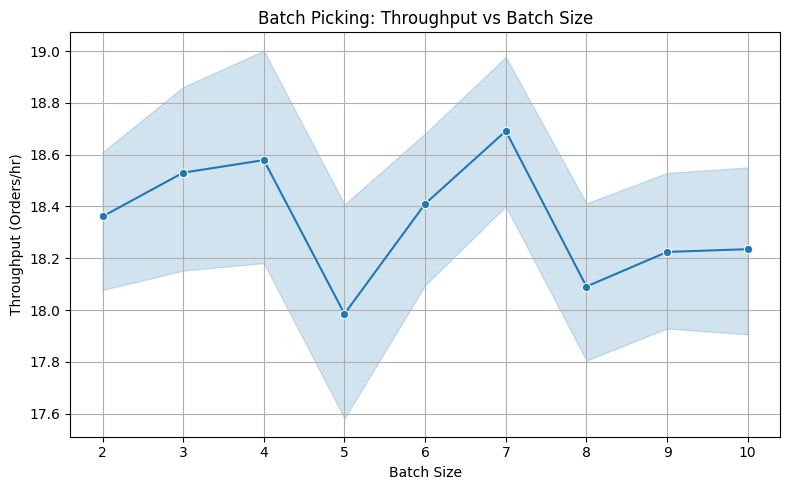

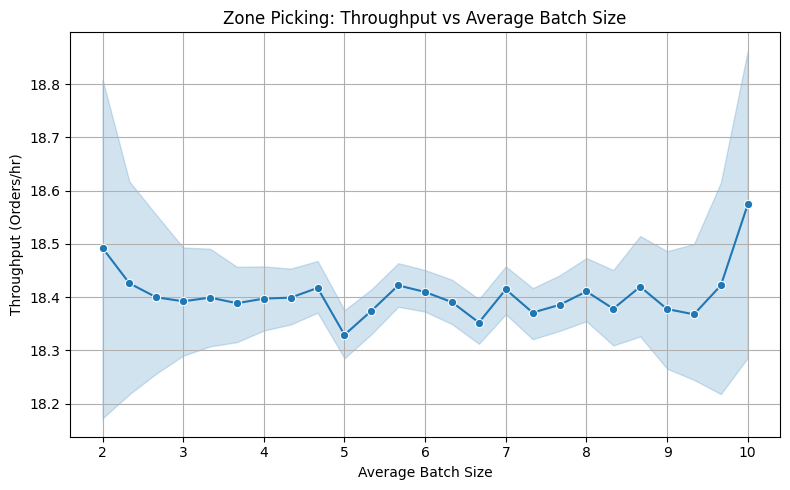

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load the data
df_batch = pd.read_csv('/content/results-batchsize-exp-batch-27-04.csv')
df_zone = pd.read_csv('/content/results-batchsize-exp-zone-27-04.csv')

# ✅ Rename columns properly
df_batch.columns = ["Batch Size", "Cycle Time", "Picker Utilization", "Orders per Labour Hour", "Throughput"]
df_zone.columns = ["Batch Size Zone 1", "Batch Size Zone 2", "Batch Size Zone 3", "Cycle Time", "Picker Utilization", "Orders per Labour Hour", "Throughput"]

# ✅ For Batch Picking: Plot Batch Size vs Throughput
plt.figure(figsize=(8,5))
sns.lineplot(x="Batch Size", y="Throughput", data=df_batch, marker="o")
plt.title("Batch Picking: Throughput vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Throughput (Orders/hr)")
plt.grid(True)
plt.tight_layout()
plt.savefig("optimal_batch_size_plot_batch.png")
plt.show()

# ✅ For Zone Picking: Average batch size calculation (if needed)
df_zone["Average Batch Size"] = (df_zone["Batch Size Zone 1"] + df_zone["Batch Size Zone 2"] + df_zone["Batch Size Zone 3"]) / 3

# ✅ For Zone Picking: Plot Average Batch Size vs Throughput
plt.figure(figsize=(8,5))
sns.lineplot(x="Average Batch Size", y="Throughput", data=df_zone, marker="o")
plt.title("Zone Picking: Throughput vs Average Batch Size")
plt.xlabel("Average Batch Size")
plt.ylabel("Throughput (Orders/hr)")
plt.grid(True)
plt.tight_layout()
plt.savefig("optimal_batch_size_plot_zone.png")
plt.show()
